In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn 
from IPython.display import display
from sklearn.datasets import make_blobs
import seaborn
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [49]:
vacancies = pd.read_csv('job_postings_19k.csv')
vacancies.head(5)

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


Totaal aantal unieke bedrijven: 4554


Text(0, 0.5, '# AANTAL VACATURES')

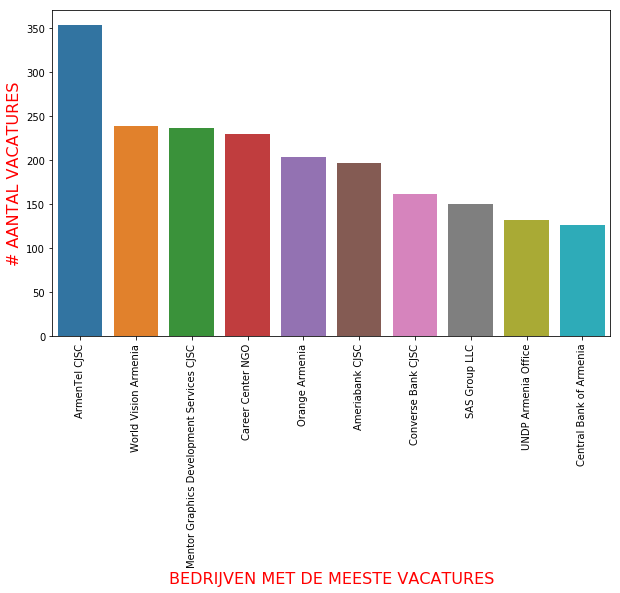

In [34]:
#PART 1, Data Analysis
#Now, we are finding total number of compnaies who require data scientist
total_no_company=vacancies['Company'].nunique()
print('Totaal aantal unieke bedrijven:',total_no_company)

#finding highest number of vacancy in a company
most_vacancy= vacancies.groupby(['Company'])['Title'].count()
most_vacancy=most_vacancy.reset_index(name='Title')
most_vacancy=most_vacancy.sort_values(['Title'],ascending=False)
pareto_df=most_vacancy
most_vacancy=most_vacancy.head(10)

# Plot graph for top most vacancy
fig, ax = plt.subplots(figsize = (10,6))
ax=seaborn.barplot(x="Company", y="Title", data=most_vacancy)    
ax.set_xticklabels(most_vacancy['Company'],rotation=90)  
ax.set_xlabel('BEDRIJVEN MET DE MEESTE VACATURES',fontsize=16, color='red')
ax.set_ylabel('# AANTAL VACATURES',fontsize=16,color='red') 

In [5]:
vacancies.describe()

,Year,Month
count,19001.000000,19001.000000
mean,2010.274722,6.493869
std,3.315609,3.405503
min,2004.000000,1.000000
25%,2008.000000,3.000000
50%,2011.000000,7.000000
75%,2013.000000,9.000000
max,2015.000000,12.000000


In [6]:
vacancies.count()

jobpost             19001
date                19001
Title               18973
Company             18994
AnnouncementCode     1208
Term                 7676
Eligibility          4930
Audience              640
StartDate            9675
Duration            10798
Location            18969
JobDescription      15109
JobRequirment       16479
RequiredQual        18517
Salary               9622
ApplicationP        18941
OpeningDate         18295
Deadline            18936
Notes                2211
AboutC              12470
Attach               1559
Year                19001
Month               19001
IT                  19001
dtype: int64

In [12]:
vacancies['Title'].nunique()

8636

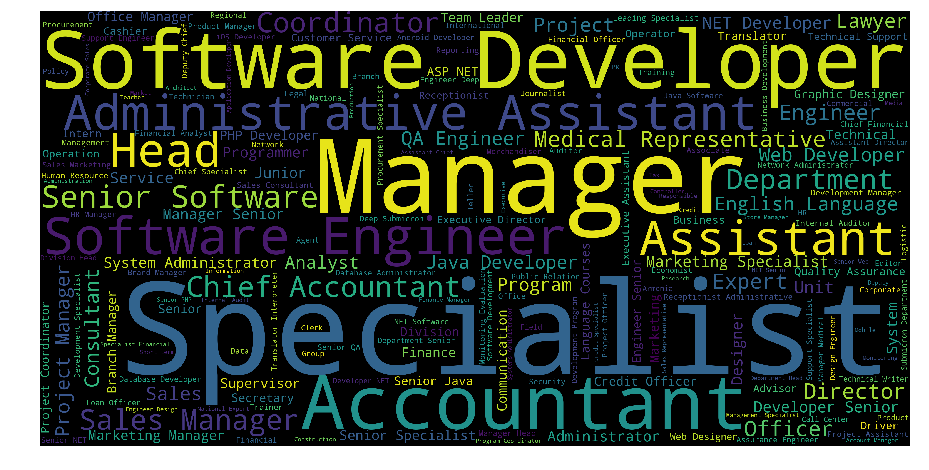

In [15]:
# Create a wordcloud of the vacancy titles
vacancies['Title'] = vacancies['Title'].fillna("").astype('str')
title_corpus = ' '.join(vacancies['Title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [50]:
# Break up the big characteristics string into a string array
# vacancies['JobDescription'] = vacancies['JobDescription'].str.split('|')
# Convert characteristics to string value
vacancies['JobDescription'] = vacancies['JobDescription'].fillna("").astype('str')

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(vacancies['JobDescription'])
tfidf_matrix.shape

(19001, 128724)

In [52]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.        , 0.00232114, 0.00911721],
       [0.        , 0.        , 0.        , 0.        ],
       [0.00232114, 0.        , 1.        , 0.0439957 ],
       [0.00911721, 0.        , 0.0439957 , 1.        ]])

In [53]:
# Build a 1-dimensional array with vacancy titles
titles = vacancies['Title']
indices = pd.Series(vacancies.index, index=vacancies['Title'])

# Function that get vacancy recommendations based on the cosine similarity score of vacancy characteristics
def characteristic_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
#     sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    vacancy_indices = [i[0] for i in sim_scores]
    return titles.iloc[vacancy_indices]


In [54]:
# Build a 1-dimensional array with vacancy titles
titles = vacancies['Title']
indices = pd.Series(vacancies.index, index=vacancies['Title'])
indices.head(20)

Title
Chief Financial Officer                                      0
Full-time Community Connections Intern (paid internship)     1
Country Coordinator                                          2
BCC Specialist                                               3
Software Developer                                           4
Saleswoman                                                   5
Chief Accountant/ Finance Assistant                          6
Non-paid part or full time Programmatic Intern               7
Assistant to Managing Director                               8
Program Assistant (INL), FSN-8; FP-6*                        9
Short-Term Travel Grants (STG) Program                      10
Non-paid part or full time Administrative Intern            11
Chief of Party (COP)                                        12
Community Development, Capacity Building and Conflict       13
General Manager                                             14
Network Administrator                            

In [55]:
characteristic_recommendations('Graphic Designer').head(20)

1     Full-time Community Connections Intern (paid i...
2                                   Country Coordinator
3                                        BCC Specialist
4                                    Software Developer
5                                            Saleswoman
6                   Chief Accountant/ Finance Assistant
7        Non-paid part or full time Programmatic Intern
8                        Assistant to Managing Director
9                 Program Assistant (INL), FSN-8; FP-6*
10               Short-Term Travel Grants (STG) Program
11     Non-paid part or full time Administrative Intern
12                                 Chief of Party (COP)
13    Community Development, Capacity Building and C...
14                                      General Manager
15                                Network Administrator
16                      Utopian World Championship 2004
17                              Country Economist (NOB)
18                          Driver/ Logistics As

In [57]:
import MySQLdb

db = MySQLdb.connect(host='your host name',  # your host name is often 'localhost'
                     user='your username',            
                     passwd='your password',  
                     db='your database')        

cur = db.cursor()

# to apply SQL
cur.execute('SELECT * FROM your table')

for row in cur.fetchall():
    print(row)

db.close()

ModuleNotFoundError: No module named 'MySQLdb'